# 🚦 German Traffic Sign Recognition with CNN

This notebook demonstrates the complete pipeline for classifying German traffic signs using a Convolutional Neural Network (CNN) on the [GTSRB dataset](https://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

## ✅ Workflow Overview

- Load and preprocess training, validation, and test data  
- Build and train a CNN model  
- Evaluate model performance  
- Plot training curves and confusion matrix  
- Analyze accuracy on the official test set

📌 Goal: Accurately classify 43 different traffic sign classes using deep learning.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical


2025-05-24 19:33:29.862384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748115209.885485     528 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748115209.892592     528 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# Load the train data
data_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"
img_size = 32  # Resize all images to 32x32


In [6]:
images = []
labels = []


In [7]:

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)

        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(int(label))
        except:
            # Skip unreadable/corrupt files
            continue


In [8]:
# Convert to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Normalize
X = X / 255.0


In [9]:
# One-hot encode labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)


In [10]:
# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


## 🧠 CNN Model Description

The CNN model used in this project is a simple yet effective deep learning architecture for image classification of traffic signs. It is designed to extract hierarchical features from the 32×32 RGB traffic sign images.

### 🔧 Model Architecture

- **Input Layer**: 32×32×3 RGB images
- **Conv2D Layer 1**: 32 filters, 3×3 kernel, ReLU activation
- **MaxPooling2D Layer 1**: 2×2 pool size
- **Conv2D Layer 2**: 64 filters, 3×3 kernel, ReLU activation
- **MaxPooling2D Layer 2**: 2×2 pool size
- **Conv2D Layer 3**: 128 filters, 3×3 kernel, ReLU activation
- **Flatten Layer**: Converts 3D feature maps to 1D vector
- **Dense Layer 1**: 128 units, ReLU activation
- **Dropout**: 0.5 (to reduce overfitting)
- **Output Layer**: Softmax activation with 43 units (one for each class)

### ⚙️ Compilation

- **Loss Function**: Categorical Crossentropy (multi-class classification)
- **Optimizer**: Adam
- **Metrics**: Accuracy


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


I0000 00:00:1748115288.751126     528 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748115288.751753     528 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 495,171 (1.89 MB)

 Trainable params: 164,907 (644.17 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 329,816 (1.26 MB)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=64,
                    validation_data=(X_val, y_val))


Epoch 1/15


I0000 00:00:1748115293.933024     580 service.cc:148] XLA service 0x7a8cf4002960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748115293.933055     580 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748115293.933059     580 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748115294.262114     580 cuda_dnn.cc:529] Loaded cuDNN version 90300


 44/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1151 - loss: 4.0261

I0000 00:00:1748115296.884777     580 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


368/368 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3986 - loss: 2.3795 - val_accuracy: 0.7141 - val_loss: 1.0079
Epoch 2/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8994 - loss: 0.3201 - val_accuracy: 0.9515 - val_loss: 0.1434
Epoch 3/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9591 - loss: 0.1280 - val_accuracy: 0.9852 - val_loss: 0.0560
Epoch 4/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0744 - val_accuracy: 0.9903 - val_loss: 0.0319
Epoch 5/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9870 - val_loss: 0.0415
Epoch 6/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0470 - val_accuracy: 0.9860 - val_loss: 0.0528
Epoch 7/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0434 - val_accuracy: 0.9893 - val_loss: 0.0310
Epoch 8/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9811 - va

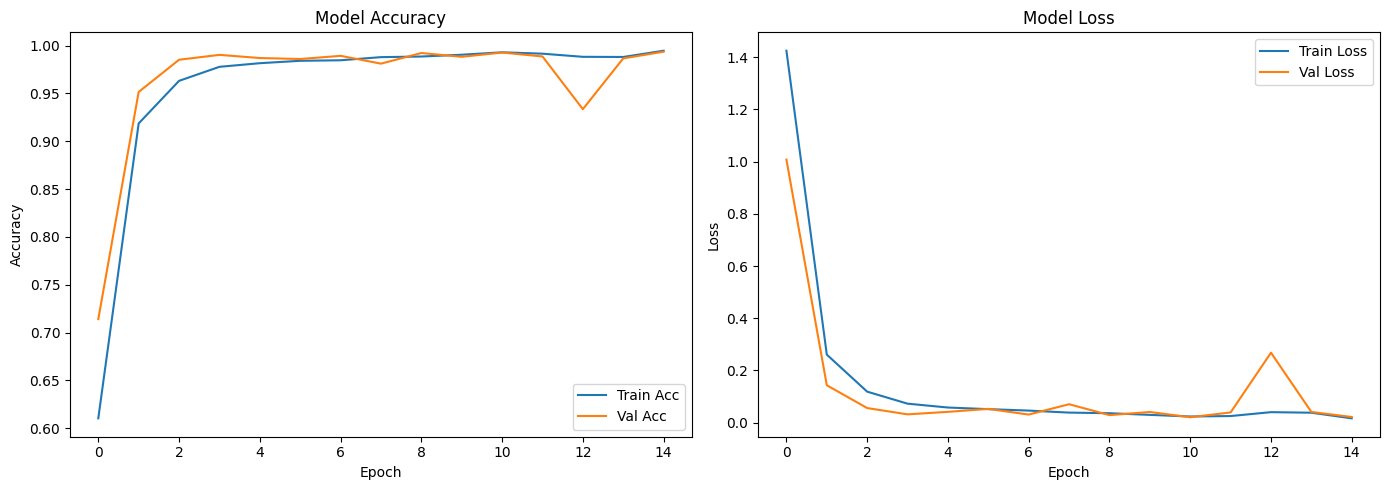

In [13]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9971 - loss: 0.0137
Test Accuracy: 0.9968


## Test images

In [28]:
import pandas as pd

test_dir = "/kaggle/input/gtsrb-german-traffic-sign"
csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Test.csv"


In [29]:
df_test = pd.read_csv(csv_path)
print(df_test.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [30]:
X_test_final = []
y_test_final = []
img_size = 32

for i in range(len(df_test)):
    img_path = os.path.join(test_dir, df_test['Path'][i])
    label = df_test['ClassId'][i]

    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    X_test_final.append(img)
    y_test_final.append(label)

X_test_final = np.array(X_test_final) / 255.0
y_test_final = np.array(y_test_final)


In [31]:
y_test_final_cat = to_categorical(y_test_final, num_classes)


In [32]:
test_loss, test_acc = model.evaluate(X_test_final, y_test_final_cat)
print(f"🚦 GTSRB Official Test Accuracy: {test_acc:.4f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9601 - loss: 0.1796
🚦 GTSRB Official Test Accuracy: 0.9596


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


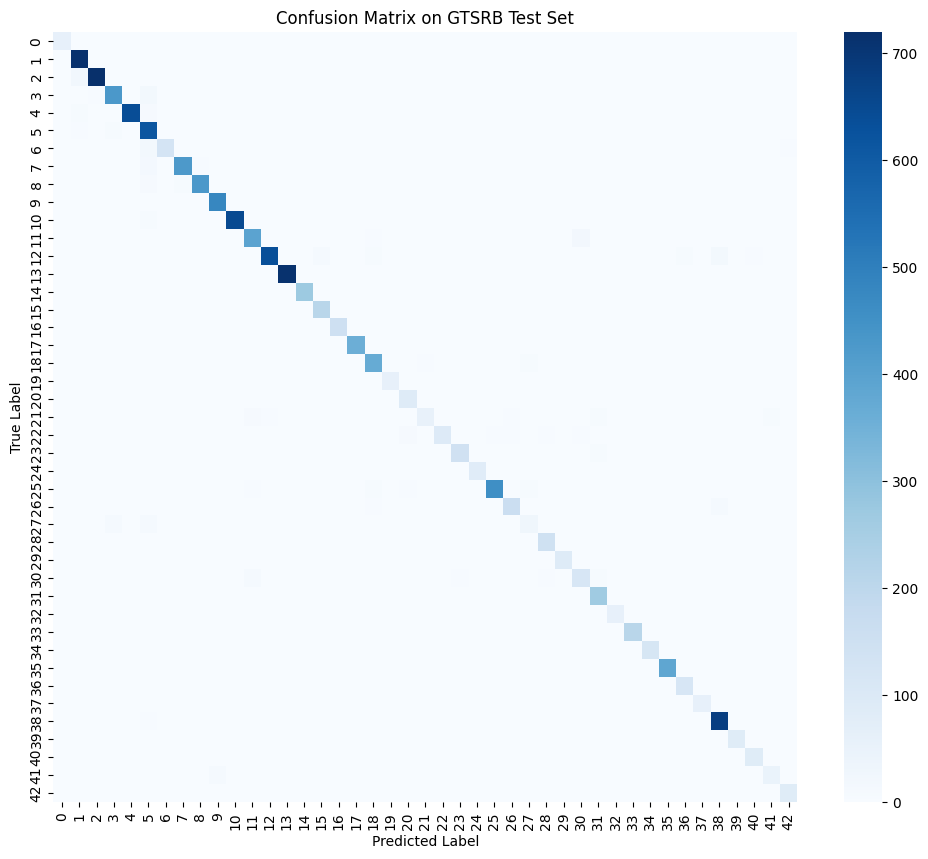

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test_final)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test_final, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt='d')
plt.title("Confusion Matrix on GTSRB Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


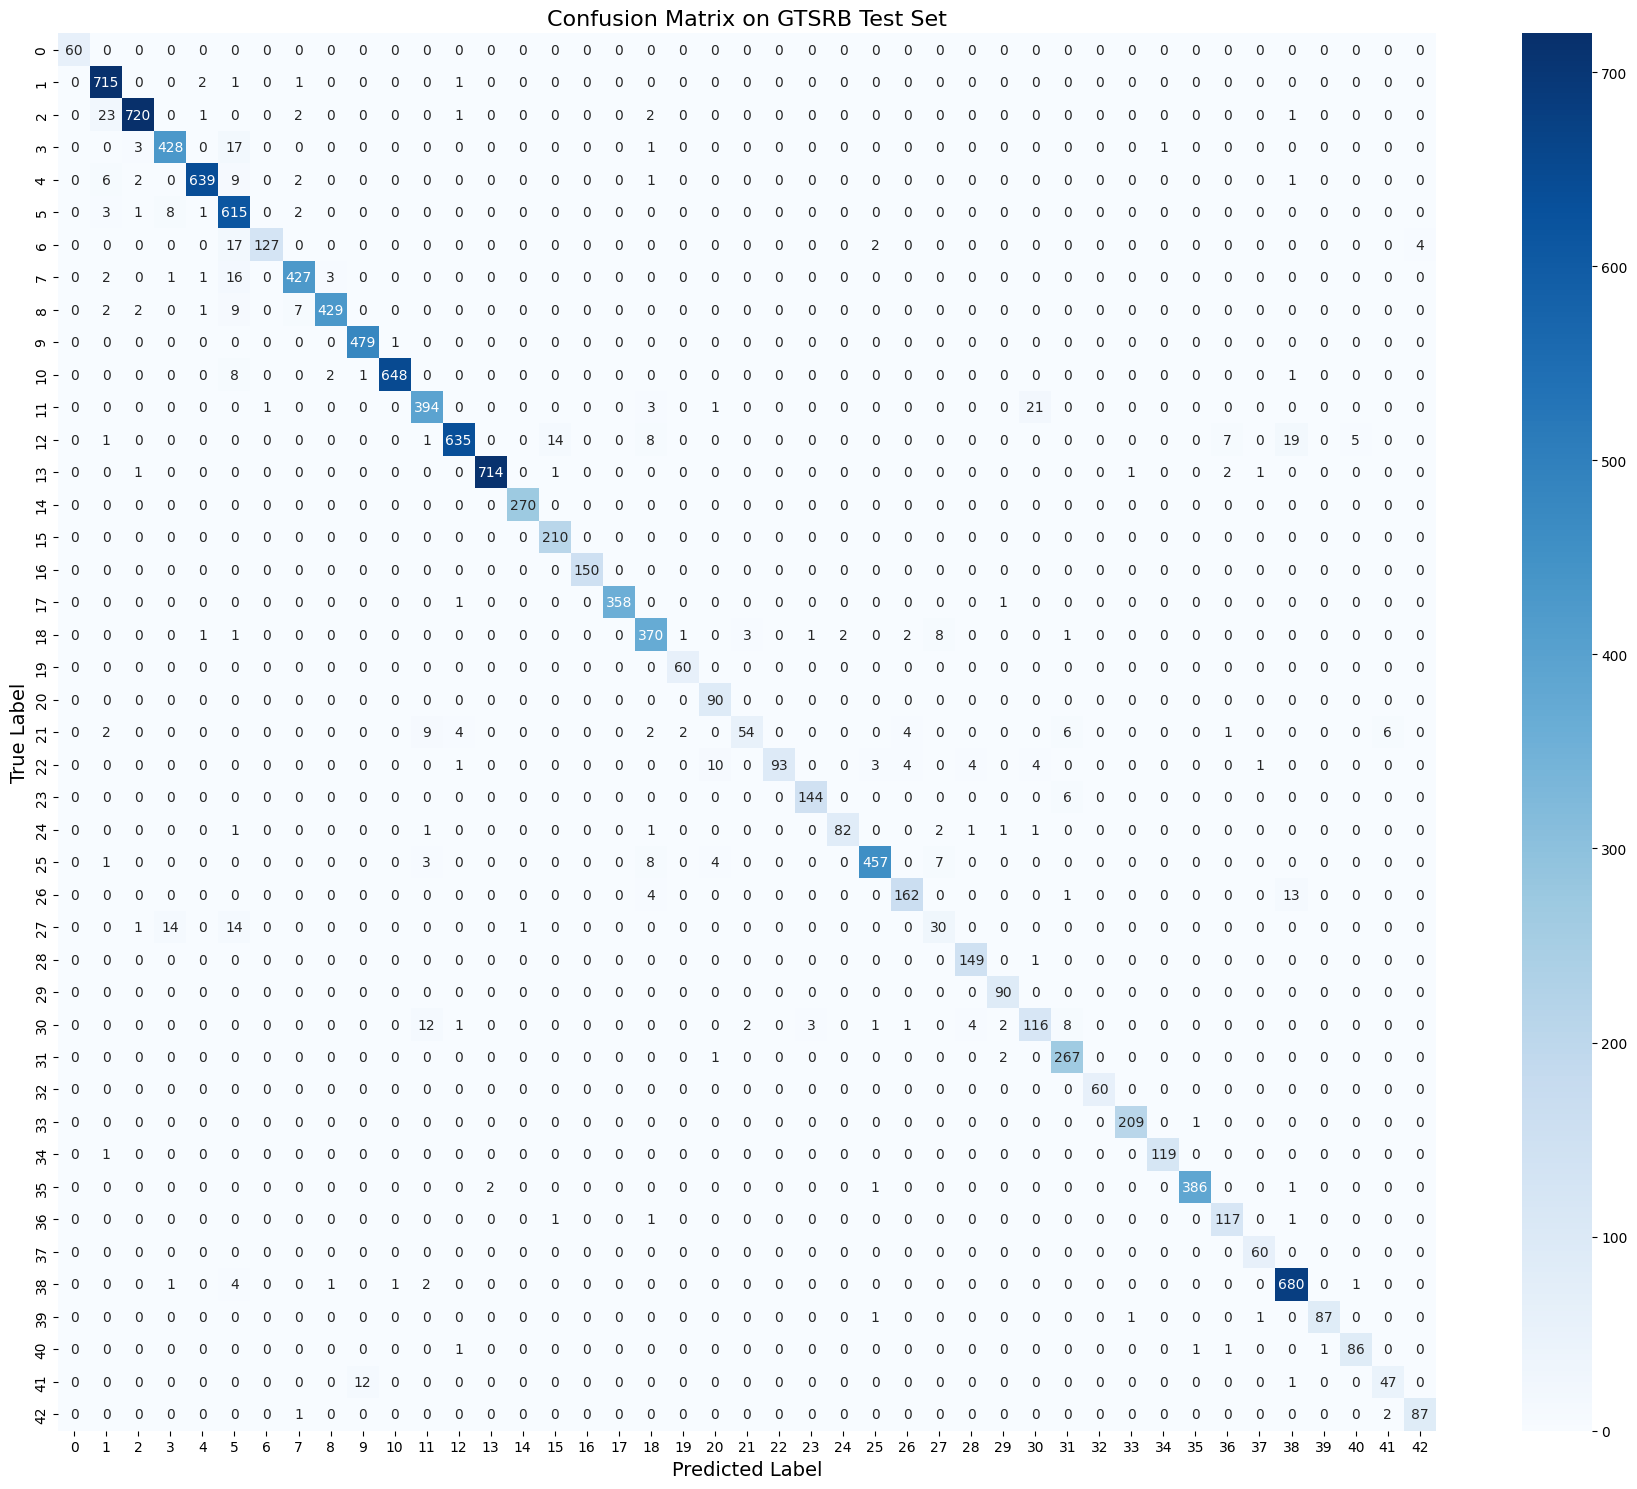

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes from the model
y_pred_probs = model.predict(X_test_final)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_final, y_pred_classes)

# Plot
plt.figure(figsize=(18, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(num_classes), 
            yticklabels=np.arange(num_classes))

plt.title("Confusion Matrix on GTSRB Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_final, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.99      0.97       720
           2       0.99      0.96      0.97       750
           3       0.95      0.95      0.95       450
           4       0.99      0.97      0.98       660
           5       0.86      0.98      0.92       630
           6       0.99      0.85      0.91       150
           7       0.97      0.95      0.96       450
           8       0.99      0.95      0.97       450
           9       0.97      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.93      0.94      0.94       420
          12       0.98      0.92      0.95       690
          13       1.00      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       1.00      1.00      1.00       150
          17       1.00    

---

## 🙏 Thank You!

Thank you for going through this notebook on German Traffic Sign Recognition using CNNs.

If you found it helpful or have suggestions for improvement, feel free to reach out or contribute.  
Happy Learning and Safe Driving! 🚗💡

---
